Analisis exploratorio.

para iniciar con el analisis, vamos a ahcer seguimiento al KPI propuesto.


In [1]:
# importamos las librerias que vamos necesitando durante el proceso.
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [2]:
#traemos nuestro archivo csv.
aa=pd.read_csv('avis.csv',sep='|',encoding='utf-8')

In [3]:
aa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4991 entries, 0 to 4990
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fecha              4991 non-null   object 
 1   hora               3492 non-null   object 
 2   pais               4991 non-null   object 
 3   operadora          4981 non-null   object 
 4   vuelo_numero       1325 non-null   object 
 5   ruta               4242 non-null   object 
 6   tipo_aeronave      4991 non-null   object 
 7   registro_aeronave  189 non-null    float64
 8   abordo             4991 non-null   int64  
 9   pasajeros          4787 non-null   float64
 10  tripulantes        4789 non-null   float64
 11  bajas              4991 non-null   int64  
 12  bajas_pasajeros    4770 non-null   float64
 13  bajas_tripulacion  4771 non-null   float64
 14  bajas_tierra       4959 non-null   float64
 15  Descripcion        4940 non-null   object 
dtypes: float64(6), int64(2),

In [4]:
aa.shape

(4991, 16)

In [5]:
aa

,fecha,hora,pais,operadora,vuelo_numero,ruta,tipo_aeronave,registro_aeronave,abordo,pasajeros,tripulantes,bajas,bajas_pasajeros,bajas_tripulacion,bajas_tierra,Descripcion
0,1908-09-17,17:18,other,Military US Army,NaN,Demonstration,Wright Brothers,NaN,2,1.0,1.0,1,1.0,0.0,0.0,During a demonstration flight a US Army flyer ...
1,1909-09-07,NaN,France,NaN,NaN,Air show,Wright Brothers,NaN,1,0.0,1.0,1,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12,06:30,other,Military US Navy,NaN,Test flight,other,NaN,5,0.0,5.0,5,0.0,5.0,0.0,First US dirigible Akron exploded just offshor...
3,1913-08-06,NaN,Canada,Private,NaN,NaN,other,NaN,1,0.0,1.0,1,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,1913-09-09,18:30,other,Military German Navy,NaN,NaN,other,NaN,20,NaN,NaN,14,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4986,2021-03-28,18:35,other,Soloy Helicopters,NaN,Sightseeing Charter,other,NaN,6,5.0,1.0,5,4.0,1.0,0.0,The sightseeing helicopter crashed after missi...
4987,2021-05-21,18:00,Nigeria,Military Nigerian Air Force,NaN,NaN,Beechcraft,NaN,11,7.0,4.0,11,7.0,4.0,0.0,While on final approach in poor weather condit...
4988,2021-06-10,08:00,Myanmar,Military Myanmar Air Force,NaN,Naypyidaw Anisakan,Beechcraft,4610.0,14,12.0,2.0,12,11.0,1.0,0.0,The plane was carrying military personnel and ...
4989,2021-07-04,11:30,Philippines,Military Philippine Air Force,NaN,Cagayan de OroLumbia Jolo,Lockheed Martin,5125.0,96,88.0,8.0,50,NaN,NaN,3.0,While attempting to land at Jolo Airport the m...


In [6]:
columnas_a_eliminar = ["hora", "vuelo_numero", "registro_aeronave"]
aa = aa.drop(columnas_a_eliminar, axis=1)

# formatizo bien la fecha
aa['fecha'] = pd.to_datetime(aa['fecha'])

#las columnas a números
columnas_numericas = ['abordo', 'pasajeros', 'tripulantes', 'bajas', 'bajas_pasajeros', 'bajas_tripulacion', 'bajas_tierra']
aa[columnas_numericas] = aa[columnas_numericas].fillna(0).astype(int)

In [7]:
aa.shape

(4991, 13)

In [8]:
aa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4991 entries, 0 to 4990
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fecha              4991 non-null   datetime64[ns]
 1   pais               4991 non-null   object        
 2   operadora          4981 non-null   object        
 3   ruta               4242 non-null   object        
 4   tipo_aeronave      4991 non-null   object        
 5   abordo             4991 non-null   int64         
 6   pasajeros          4991 non-null   int64         
 7   tripulantes        4991 non-null   int64         
 8   bajas              4991 non-null   int64         
 9   bajas_pasajeros    4991 non-null   int64         
 10  bajas_tripulacion  4991 non-null   int64         
 11  bajas_tierra       4991 non-null   int64         
 12  Descripcion        4940 non-null   object        
dtypes: datetime64[ns](1), int64(7), object(5)
memory usage: 507.0+ 

ahora si estamos listos para los graficos.


In [9]:
# Tasa de Fatalidad de la Tripulación
aa['tasa_fatalidad_tripulacion'] = aa['bajas_tripulacion'] / aa['abordo']

# Tasa de Supervivencia de Pasajeros
aa['tasa_supervivencia_pasajeros'] = (aa['abordo'] - aa['bajas_pasajeros']) / aa['abordo']


In [10]:
#importamos matplotlib.
#
# Filtrar datos por década anterior (por ejemplo, 2011-2020)
decada_anterior = aa[(aa['fecha'] >= '2011-01-01') & (aa['fecha'] <= '2020-12-31')]

# Filtrar datos por última década (por ejemplo, 2021-2030)
ultima_decada = aa[(aa['fecha'] >= '2021-01-01') & (aa['fecha'] <= '2030-12-31')]

# Calcular la tasa de fatalidad de la tripulación para ambas décadas
tasa_fatalidad_anterior = decada_anterior['tasa_fatalidad_tripulacion'].mean()
tasa_fatalidad_ultima = ultima_decada['tasa_fatalidad_tripulacion'].mean()


In [11]:
disminucion_porcentaje = ((tasa_fatalidad_anterior - tasa_fatalidad_ultima) / tasa_fatalidad_anterior) * 100

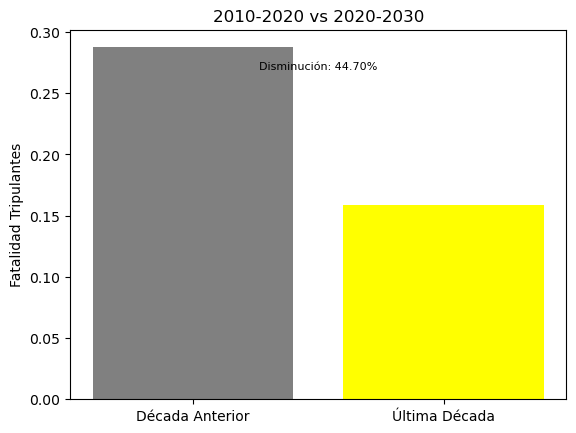

In [12]:
#Crear un gráfico de barras para visualizar las tasas de fatalidad
fig, ax = plt.subplots()
decadas = ['Década Anterior', 'Última Década']
tasas = [tasa_fatalidad_anterior, tasa_fatalidad_ultima]

ax.bar(decadas, tasas, color=['grey', 'yellow'])
ax.set_ylabel('Fatalidad Tripulantes')
ax.set_title('2010-2020 vs 2020-2030')

# Mostrar el porcentaje de disminución en el gráfico
plt.text(0.5, 0.9, f'Disminución: {disminucion_porcentaje:.2f}%', ha='center', va='center', transform=ax.transAxes, fontsize=8)

# Mostrar el gráfico
plt.show()

Tasa de mortalidad de tripulantes de las ultimas dos decadas:
se puede observar una disminucion de '44.70% de lña tasa de mortalidad en comparacion a la decada anterior (si no tenemos en cuenta que vamos en  1/3 de la decada).
esto me hace pensar en tres puntos.
    1. la tasa de mortalidad para el 2030 va a ser superior a la de la dacada anterior (se puede prevenir este resultado)
    2. es probable que haya temporadas entre las epocas con mas riesgo de accidentes(debido fenomenos naturales o demas causas externas), (esto podria prevenirse).
    3. es cada dia mas peligroso trabajar en este sector?.

